## Задание №1

Дана функция:

$f(x)=0.5{x^2}−0.1\frac{1}{e^{-x}}+0.5 cos(2x)-2$

Необходимо выполнить ее аппроксимацию (восстановление) на интервале [-5, 5] моделью вида:

$ a(x) = w_0 + w_1*x + w_2*x^2 + w_3 * cos(2x) + w_4 * sin(2x)$

Вектор параметров 
$w = [w_0, w_1, w_2, w_3, w_4]^T$ следует искать с помощью алгоритма стохастического градиентного спуска (SGD):

$$w_n = w_{n-1}−η⋅ \frac{∂L_i(w)}{∂w}$$

где i - случайно выбранный образ из обучающей выборки $L_i(w)$ - квадратичная функция потерь:

$$L_i(w) = (a(x_i, w) - y_i)^2 = (w^T * x_i - y_i)^2 $$ 

где $ x_i = [1,x,x^2,cos(2x),sin(2x)]^T$ - вектор признаков i-го образа; 
$y_i$ - значение функции f(x) в i-й точке.

Производная этой функции может быть записана в следующем векторно-матричном виде:

$$\frac{∂L_i(w)}{∂w} = 2*(w^T * x_i - y_i)*x_i^T $$

Продолжите программу, в которой объявлена функция f(x) с именем func, заданы значения функции по оси абсцисс и ординат, а также начальные значения и параметры для алгоритма SGD

На каждой итерации алгоритма SGD необходимо выбирать один случайный образ k:

``k = np.random.randint(0, sz) # sz - размер выборки (массива coord_x)``

из массива coord_x и на его основе формировать вектор признаков:

$ x_k = [1,x,x^2,cos(2x),sin(2x)]^T$

И пересчитывать значение Qe - экспоненциального скользящего среднего по формуле:

$Q_e = λ * L_k(w) + (1-λ) * Q_e $

Вычисленные параметры вектора w следует сохранить в виде списка или кортежа с именем ``w``. Также нужно вычислить итоговое значение среднего эмпирического риска для обученной модели по формуле:

$$Q(a,X) = \frac{1}{n}* \sum_ {i=1}^n {L_i(w)}$$

Вычисленное значение Q(a,X) сохраните в переменной ``Q``, а последнее значение $Q_e$ - в переменной ``Qe``.

In [ ]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.array([0., 0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
x_i = np.column_stack((np.ones(sz), coord_x, coord_x ** 2, np.cos(2*coord_x), np.sin(2*coord_x)))                         
Qe = np.mean((x_i @ w.T - coord_y) ** 2) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
L = np.array([])

for i in range(N):
    k = np.random.randint(0, sz-1)

    x = x_i[k]

    l = (x @ w.T - coord_y[k]) ** 2
    L = np.append(L,l)

    dl = 2 * (x @ w.T - coord_y[k]) * x.T

    w -= eta * dl

    Qe = lm * l + (1-lm) * Qe

Q = np.mean((x_i @ w.T - coord_y) ** 2) 

## Задание №2

Дана функция:

$f(x)=0.5x + 0.2x^2 - 0.05x^3 + 0.2sin(4x) - 2.5 $

Необходимо выполнить ее аппроксимацию (восстановление) на интервале [-4, 6] моделью вида:

$ a(x) = w_0 + w_1*x + w_2*x^2 + w_3 * x^3$

Вектор параметров $w = [w_0,w_1,w_2,w_3]^T$ следует искать с помощью алгоритма стохастического градиентного спуска (SGD) с квадратичной функцией потерь:

$$w_n = w_{n-1}−η⋅ \frac{∂Qk(w)}{∂w}$$

где k - случайно выбранный образ из обучающей выборки; Qk(w) - усеченный эмпирический риск:

$$Qk(w) = \frac{1}{K}* \sum_ {i=k}^{k+K-1} (a(x_i,w) - y_i)^2 = \frac{1}{K}* \sum_ {i=k}^{k+K-1} (w^T*x_i - y_i)^2 $$

где $x_i = [1,x,x^2,x^3]^T $ - вектор признаков i-го образа; $y_i$ - значение функции f(x) в i-й точке.

Производная усеченного показателя качества может быть записана в следующем векторно-матричном виде:

$$\frac{∂Qk(w)}{∂w} = \frac{2}{K} \sum_ {i=k}^{k+K-1} (w^T * x_i - y_i) * x_i^T $$

То есть, псевдоградиент вычисляется не по одному образу k, а по образам в диапазоне [k; k+K) (всего K образов).

Продолжите программу, в которой объявлена функция f(x) с именем func, заданы значения функции по оси абсцисс и ординат, а также начальные значения и параметры для алгоритма SGD

На каждой итерации алгоритма SGD необходимо выбирать начальное значение k командой:

``k = np.random.randint(0, sz-batch_size) # sz - размер выборки (массива coord_x)``

и из массива coord_x формировать векторы признаков:

$x_i = [1,x,x^2,x^3]^T$

для вычисления псевдоградиента Qk по образам от k до k + batch_size (команда ``range(k, k+batch_size)``).

Также на каждой итерации нужно пересчитывать значение Qe - экспоненциального скользящего среднего по формуле:

$Q_e = λ * Qk(w) + (1-λ) * Q_e $

Вычисленные параметры вектора w следует сохранить в виде списка или кортежа с именем ``w``. Также нужно вычислить итоговое значение среднего эмпирического риска для обученной модели по формуле:

$$Q(a,X) = \frac{1}{n}* \sum_ {i=1}^n {L_i(w)}$$

Вычисленное значение Q(a,X) сохраните в переменной ``Q``, а последнее значение $Q_e$ - в переменной ``Qe``.


In [ ]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 50 # размер мини-батча (величина K = 50)
x_i = np.column_stack((np.ones(sz), coord_x, coord_x ** 2, coord_x ** 3))

Qe = np.mean((x_i @ w.T - coord_y) ** 2)
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(0, sz-batch_size-1)
    x_batch = x_i[k:k+batch_size]
    y_batch = coord_y[k:k+batch_size]

    y_pred = x_batch @ w.T

    error = y_pred - y_batch
    Qk = np.mean(error ** 2)  # усечённый эмпирический риск для мини-батча

    # Обновление скользящего экспоненциального среднего эмпирического риска
    Qe = lm * Qk + (1 - lm) * Qe

    er_col = error.reshape(batch_size, 1)
    # Вычисление псевдоградиента
    grad = 2 * np.mean(er_col * x_batch, axis=0)
    
    # Обновление параметров модели
    w -= eta * grad


Q = np.mean((x_i @ w.T - coord_y) ** 2)

## Задание №3

Дана функция:

$f(x) = -0.7x -0.2x^2 +0.05x^3 -0.2cos(3x) + 2$

Необходимо выполнить ее аппроксимацию (восстановление) на интервале [-4, 6] моделью вида:

$ a(x) = w_0 + w_1*x + w_2*x^2 + w_3 * x^3$

Вектор параметров $w = [w_0,w_1,w_2,w_3]^T $ следует искать с помощью алгоритма стохастического градиентного спуска (SGD) с оптимизатором импульсов Нестерова:

$$v=γ⋅v+(1−γ)⋅η⋅\frac{∂Qk(w−γ⋅v)}{∂w} $$

$w_n = w_{n-1} - v $

где k - случайно выбранный образ из обучающей выборки; Qk(w) - усеченный эмпирический риск:

$$Qk(w) = \frac{1}{K}* \sum_ {i=k}^{k+K-1} (a(x_i,w) - y_i)^2 = \frac{1}{K}* \sum_ {i=k}^{k+K-1} (w^T*x_i - y_i)^2 $$

где $x_i = [1,x,x^2,x^3]^T $ - вектор признаков i-го образа; $y_i$ - значение функции f(x) в i-й точке.

Производная усеченного показателя качества может быть записана в следующем векторно-матричном виде:

$$\frac{∂Qk(w−γ⋅v)}{∂w} = \frac{2}{K} \sum_ {i=k}^{k+K-1} ((w−γ⋅v)^T * x_i - y_i) * x_i^T $$

То есть, псевдоградиент вычисляется не по одному образу k, а по образам в диапазоне [k; k+K) (всего K образов).

Продолжите программу, в которой объявлена функция f(x) с именем func, заданы значения функции по оси абсцисс и ординат, а также начальные значения и параметры для алгоритма SGD с импульсами Нестерова

На каждой итерации алгоритма SGD необходимо выбирать начальное значение k командой:

``k = np.random.randint(0, sz-batch_size-1) # sz - размер выборки (массива coord_x)``

и из массива coord_x формировать векторы признаков:
$x_i = [1,x,x^2,x^3]^T$

для вычисления псевдоградиента Qk по образам от k до k + batch_size (команда ``range(k, k+batch_size)``)

Также на каждой итерации нужно пересчитывать значение Qe экспоненциального скользящего среднего по формуле:

$Q_e = λ * Qk(w) + (1-λ) * Q_e $

Вычисленные параметры вектора w следует сохранить в виде списка или кортежа с именем w. Также нужно вычислить итоговое значение среднего эмпирического риска для обученной модели по формуле:

$$Q(a,X) = \frac{1}{n}* \sum_ {i=1}^n {L_i(w)}$$

Вычисленное значение Q(a,X) сохраните в переменной ``Q``, а последнее значение Qe - в переменной ``Qe``.

In [ ]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.7 * x - 0.2 * x ** 2 + 0.05 * x ** 3 - 0.2 * np.cos(3 * x) + 2

def a(x,w):
    return x @ w.T

coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
gamma = 0.8 # коэффициент гамма для вычисления импульсов Нестерова
v = np.zeros(len(w))  # начальное значение [0, 0, 0, 0]
x = np.array([(1, xx, xx ** 2, xx ** 3) for xx in coord_x])

Qe = 0
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(0, sz-batch_size-1) # sz - размер выборки (массива coord_x)
    x_batch = x[k:k+batch_size]
    y_batch = coord_y[k:k+batch_size]

    Qk = np.mean([(a(x[i], w) - coord_y[i]) ** 2 for i in range(k,k+batch_size)])

    dQk = 2 * np.mean([((w - gamma * v).T @ x[i] - coord_y[i]) * x[i].T for i in range(k, k+batch_size)], axis=0)

    v = gamma * v + (1-gamma) * eta * dQk

    w -= v

    Qe = lm * Qk + (1-lm) * Qe

Q = np.mean((a(x,w) - coord_y) ** 2)

## Задание №4

Дана следующая обучающая выборка для задачи бинарной классификации и визуально образы этой выборки распределены в двумерном пространстве признаков следующим образом:

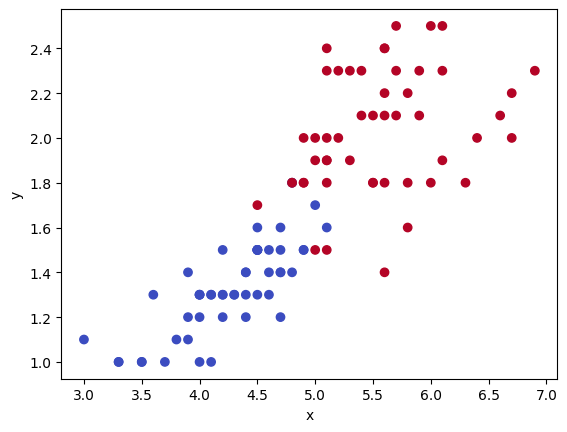

In [6]:
import matplotlib.pyplot as plt
import numpy as np

data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

x = np.array([xx[0] for xx in data_x])
y = np.array([xx[1] for xx in data_x])

plt.scatter(x, y, c=data_y, cmap='coolwarm', marker='o') 

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Вам необходимо продолжить программу для вычисления вектора параметров:

$w = [w_0,w_1,w_2]^T $

которым описывается разделяющая линия в соответствии с выражением:

$w_1*x_1 + w_2*x_2 + w_0 = 0 $

Вектор параметров w следует искать с помощью алгоритма стохастического градиентного спуска (SGD) с оптимизатором RMSProp:

$$G = α*G+(1−α)*\frac{∂Qk(w)}{∂w}*\frac{∂Qk(w)}{∂w}$$

$$w_n = w_{n-1}-η * \frac{∂Qk(w)/∂w}{\sqrt G+ϵ}$$

где k - случайно выбранный образ из обучающей выборки; Qk(w) - усеченный эмпирический риск:

$$Qk(w) = \frac{1}{K}* \sum_ {i=k}^{k+K-1} {L_i(w)}$$

То есть, псевдоградиент вычисляется не по одному образу k, а по образам в диапазоне [k; k+K) (всего K образов).

В качестве функции потерь следует выбрать логарифмическую функцию:

$L_i(w) = log_2(1+e^{-M_i}) = log_2(1+e^{-w^T*x_i*y_i}) $

Ее производная по вектору параметров w, равна:

$$\frac{∂L_i(w)}{∂w} = - \frac{e^{-w^T*x_i*y_i} * x_i^T * y_i}{(1+e^{-w^T*x_i*y_i})*ln(2)}$$

Продолжите программу, в которой сформирована обучающая выборка, заданы функции потерь и ее производной, а также начальные значения и параметры для алгоритма SGD

На каждой итерации алгоритма SGD необходимо выбирать начальное значение k командой:

``k = np.random.randint(0, n_train-batch_size-1) # n_train - размер выборки (массива x_train)``

и из массива x_train выбирать векторы признаков ${x_i} $для вычисления псевдоградиента по образам от k до k + batch_size (команда ``range(k, k+batch_size)``).

Также на каждой итерации нужно пересчитывать значение Qe экспоненциального скользящего среднего по формуле:

$Q_e = λ * Qk(w) + (1-λ) * Q_e $

Вычисленные параметры вектора w следует сохранить в виде списка или кортежа с именем ``w``. Также нужно вычислить итоговое значение среднего эмпирического риска для обученной модели по формуле:

$$Q(a,X) = \frac{1}{n}* \sum_ {i=1}^n [M_i < 0] $$

Вычисленное значение Q(a,X) сохраните в переменной ``Q``, а последнее значение Qe - в переменной ``Qe``.

In [2]:
import numpy as np

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.1, 0.05, 0.05])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 200  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

alpha = 0.7 # параметр для RMSProp
G = np.zeros(len(w))  # параметр для RMSProp
eps = 0.01 # параметр для RMSProp

Qe = np.mean(loss(w, x_train.T, y_train))
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(0, n_train-batch_size-1) # n_train - размер выборки (массива x_train)

    Qk = np.mean([loss(w, x_train[i], y_train[i]) for i in range(k,k+batch_size)])

    dQk = np.mean([df(w, x_train[i], y_train[i]) for i in range(k, k+batch_size)], axis=0)

    G = alpha * G + (1-alpha) * dQk * dQk

    w -= nt * (dQk/(np.sqrt(G)+eps))

    Qe = lm * Qk + (1-lm) * Qe

Q = np.mean((np.dot(w, x_train.T) * y_train) < 0)